In [1]:
import numpy as np
import phoebe
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
b = phoebe.load('after_optimization.bundle')

/Users/angela/miniconda3/envs/phoebe-workshop/lib/python3.8/site-packages/phoebe/parameters/parameters.py:10312: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._value = np.array(value)


In [3]:
b.enable_dataset('rv01')

<ParameterSet: 20 parameters | components: primary, binary, secondary>

In [4]:
print(b['enabled'])

ParameterSet: 3 parameters
     enabled@lcV@phoebe01@compute: True
     enabled@lcB@phoebe01@compute: True
    enabled@rv01@phoebe01@compute: True


In [5]:
b.set_value_all('irrad_method', 'none')
b.set_value_all('distortion_method', 'sphere')
b.set_value_all('rv_method', 'dynamical')

In [6]:
fit_parameters = [
    'requivsumfrac', 'requivratio', 'incl@binary', 'teffratio', 'esinw', 'ecosw',#lc
    'q', 'vgamma', 'asini@binary', # rv
    'teff@primary', 'pblum@primary', # lcV+B
]

In [7]:
b.add_distribution(
    {
    'requivsumfrac': phoebe.gaussian_around(0.05), 
    'requivratio': phoebe.gaussian_around(0.1), 
    'incl@binary': phoebe.gaussian_around(1),
    'teffratio': phoebe.gaussian_around(0.05),
    'esinw': phoebe.gaussian_around(0.01),
    'ecosw': phoebe.gaussian_around(0.01),
    'q': phoebe.gaussian_around(0.05),
    'vgamma': phoebe.gaussian_around(0.1),
    'asini@binary': phoebe.gaussian_around(0.1),
    'teff@primary': phoebe.gaussian_around(100),
    'pblum@primary': phoebe.gaussian_around(0.1),
    'sigmas_lnf@lcV': phoebe.gaussian(-5, 1),
    'sigmas_lnf@lcB': phoebe.gaussian(-5, 1)
    },
    distribution = 'init_sample'
)

<ParameterSet: 13 parameters | datasets: lcV, lcB>

In [8]:
b.add_server('remoteslurm', crimpl_name='terra', nprocs=72, walltime=48,
             use_conda=True, conda_env='phoebe-workshop',
             server='terra2')

<ParameterSet: 11 parameters | qualifiers: isolate_env, mail_user, walltime, crimpl_name, use_conda, conda_env, nprocs, use_mpi, install_deps, slurm_job_name, mail_type>

In [9]:
b.add_solver('sampler.emcee', solver='mcmc_all',
              init_from='init_sample',
              compute='phoebe01', nwalkers=72, niters=1000, progress_every_niters=50)

<ParameterSet: 16 parameters | qualifiers: nlags_factor, init_from_requires, comments, init_from, niters, progress_every_niters, priors_combine, use_server, priors, thin_factor, nwalkers, continue_from, expose_failed, compute, burnin_factor, init_from_combine>

In [10]:
b.run_solver('mcmc_all', use_server='terra2', solution='mcmc_all_solution', detach=True)

# crimpl: ssh terra "mkdir -p ~/crimpl"
# crimpl: scp exportpath.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p ~/crimpl"
# crimpl: scp crimpl_run_script.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; cd ~/crimpl; chmod +x ./crimpl_run_script.sh; ./crimpl_run_script.sh"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2021.06.11-23.44.59/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2021.06.11-23.44.59/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /

<Parameter: detached_job=unknown | keys: description, value, job_name, uniqueid, readonly, advanced, latexfmt>

In [13]:
b.load_job_progress(solution='mcmc_all_solution')

In [12]:
b.save('after_mcmc_init_2.bundle')

'after_mcmc_init_2.bundle'

#### Solution progress

In [2]:
import phoebe
b = phoebe.load('after_mcmc_init_2.bundle')
b.load_job_progress(solution='mcmc_all_solution')

/Users/angela/miniconda3/envs/phoebe-workshop/lib/python3.8/site-packages/phoebe/parameters/parameters.py:10312: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._value = np.array(value)


# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "cat /home/users/angela/crimpl/crimpl-job-2021.06.11-23.44.59/crimpl_slurm_id"
# crimpl: ssh terra "squeue -j 1650"
# crimpl: ssh terra "cat /home/users/angela/crimpl/crimpl-job-2021.06.11-23.44.59/crimpl-job.status"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2021.06.11-23.44.59/*"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2021.06.11-23.44.59/*"
# crimpl: scp terra:/home/users/angela/crimpl/crimpl-job-2021.06.11-23.44.59/{_qnnICRcdnOHBVPfmnjVtMeUPanNAfT.out,_qnnICRcdnOHBVPfmnjVtMeUPanNAfT.out.progress} ./


<ParameterSet: 22 parameters | qualifiers: adopt_values, samples, lnprobabilities, nlags, adopt_parameters, wrap_central_values, fitted_uniqueids, adopt_distributions, acceptance_fractions, distributions_convert, nwalkers, lnprob_cutoff, niters, failed_samples, burnin, thin, comments, progress, distributions_bins, autocorr_times, fitted_units, fitted_twigs>

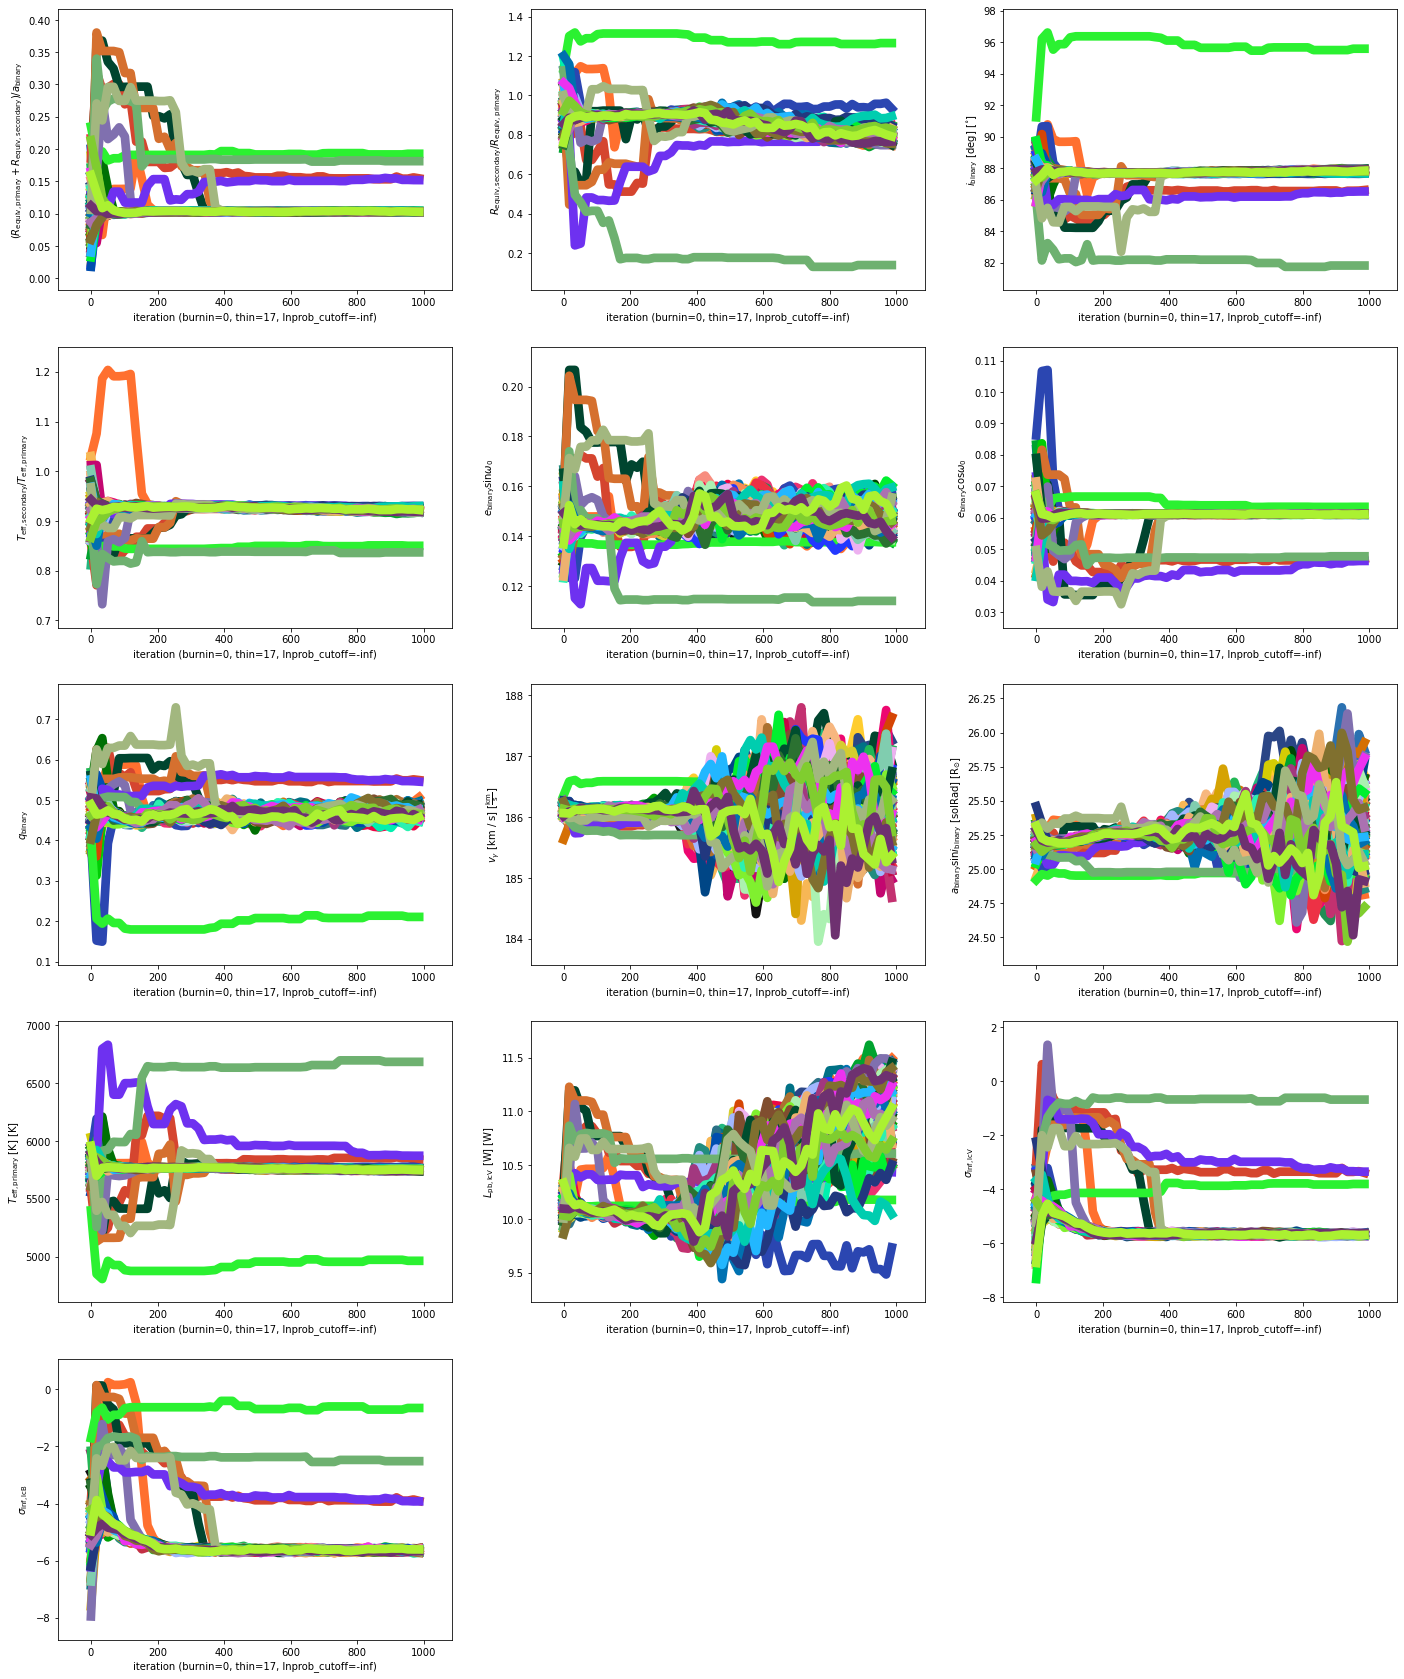

(<autofig.figure.Figure | 13 axes | 936 call(s)>,
 <Figure size 1728x2160 with 13 Axes>)

In [3]:
b.plot(solution='mcmc_all_solution', style='trace', burnin=0, show=True)

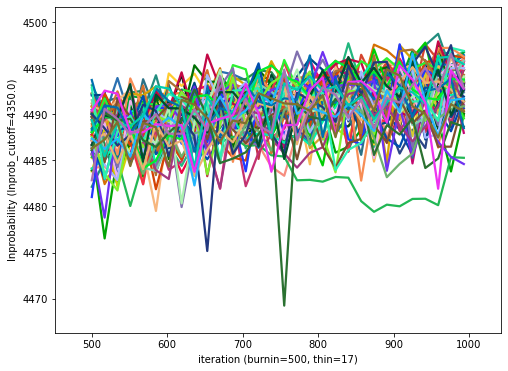

(<autofig.figure.Figure | 1 axes | 68 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [4]:
b.plot(solution='mcmc_all_solution', style='lnprobability', burnin=500, lnprob_cutoff=4350, show=True)

In [10]:
true_values = [0.09773349468841465, #requivsumfrac
               0.6361167684996606, #requivratio
               88.56, #incl
               0.8962472406181016, #teffratio
               0.13467426808972838, #esinw
               0.06137459991312339, #ecosw
               0.46417030374599694, #q
               185.5, #vgamma
               24.65110762542235, #asini
               6342, #teff1
              ] 

In [13]:
b.uncertainties_from_distribution_collection(solution='mcmc_all_solution', burnin=500, lnprob_cutoff=4350, tex=True)

requivsumfrac@binary = 0.10316 +0.00057 -0.00056  
requivratio@binary = 0.818 +0.045 -0.034  
incl@binary = 87.797 +0.067 -0.072  deg
teffratio@binary = 0.9234 +0.0032 -0.0028  
esinw@binary = 0.1485 +0.0058 -0.005  
ecosw@binary = 0.061108 +8.8e-05 -9.2e-05  
q@binary = 0.468 +0.011 -0.012  
vgamma = 186.1 +0.56 -0.54  km / s
asini@binary = 25.32 +0.16 -0.21  solRad
teff@primary = 5752.5 +7.5 -5.9  K
pblum@lcV = 10.8 +0.32 -0.43  W
sigmas_lnf@lcV = -5.671 +0.034 -0.032  
sigmas_lnf@lcB = -5.637 +0.04 -0.036  

(None, <Figure size 2059.2x2059.2 with 169 Axes>)

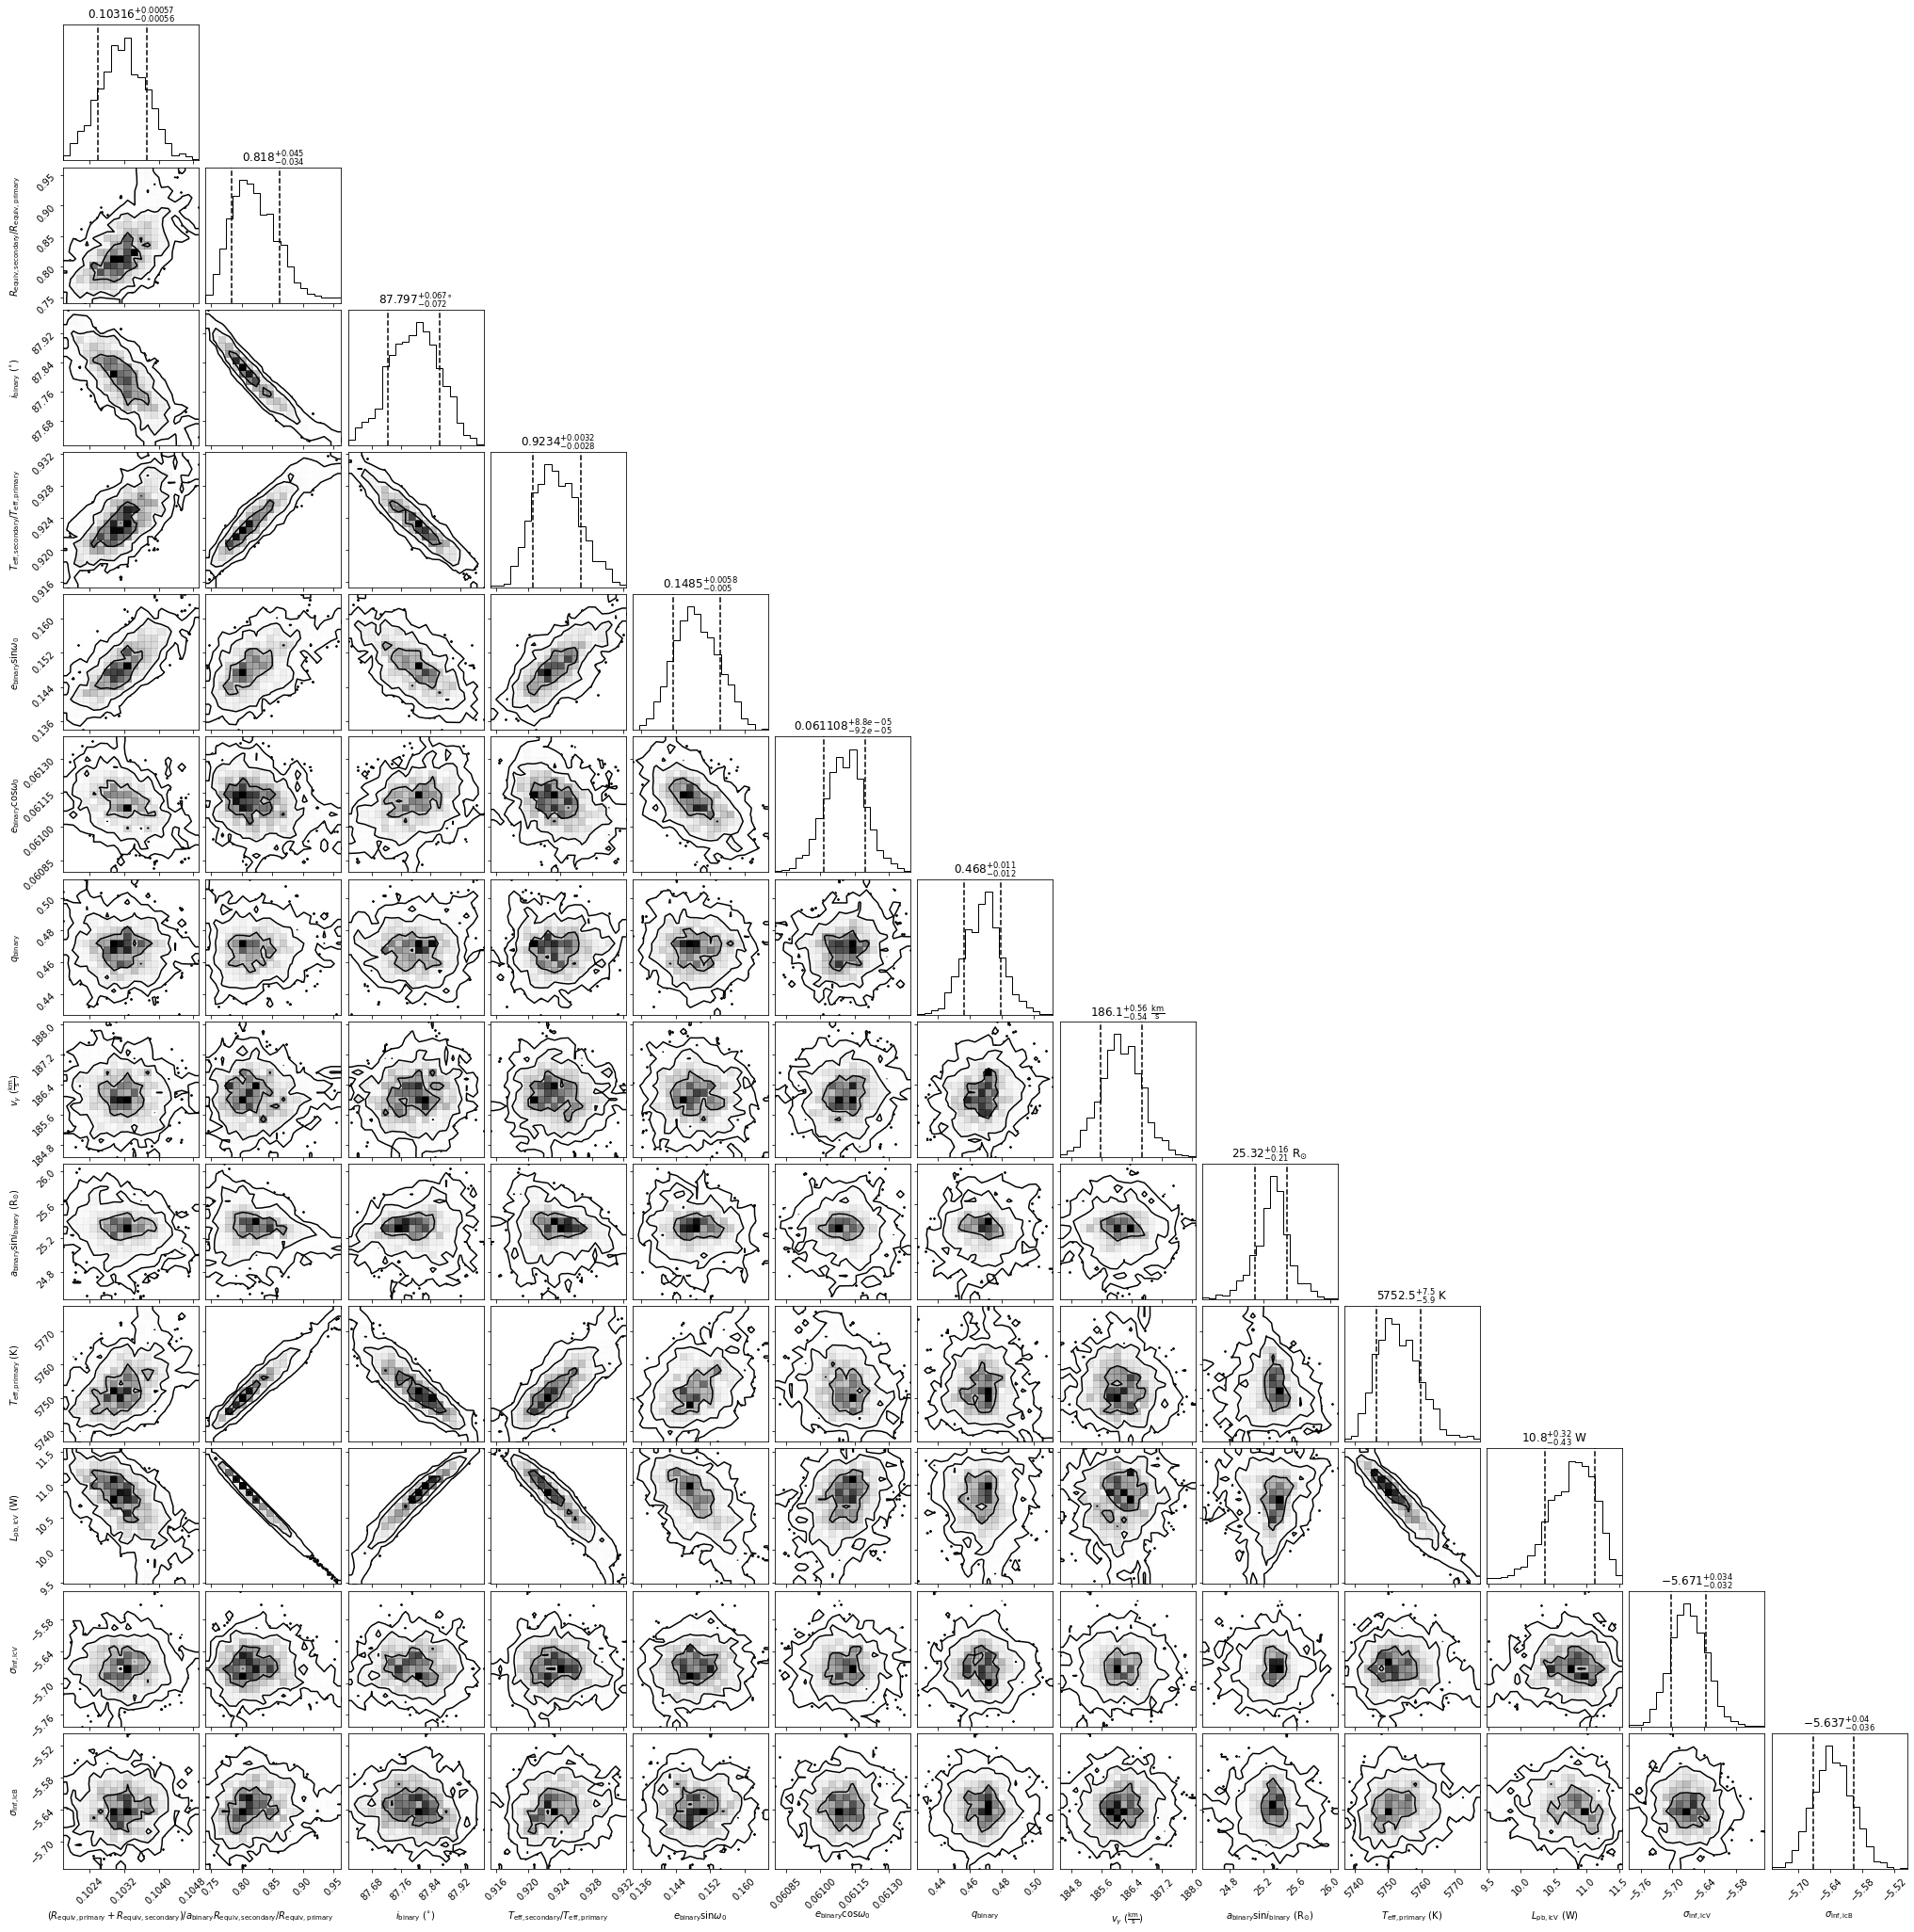

In [11]:
b.plot(solution='mcmc_all_solution', style='corner', burnin=500, lnprob_cutoff=4350, show=True)

In [17]:
b.run_compute(sample_from='mcmc_all_solution', burnin=500, lnprob_cutoff=4350, sample_num=10,
             model='after_mcmc2', overwrite=True)

100%|██████████| 10/10 [00:31<00:00,  3.15s/it]


<ParameterSet: 14 parameters | kinds: rv, lc>

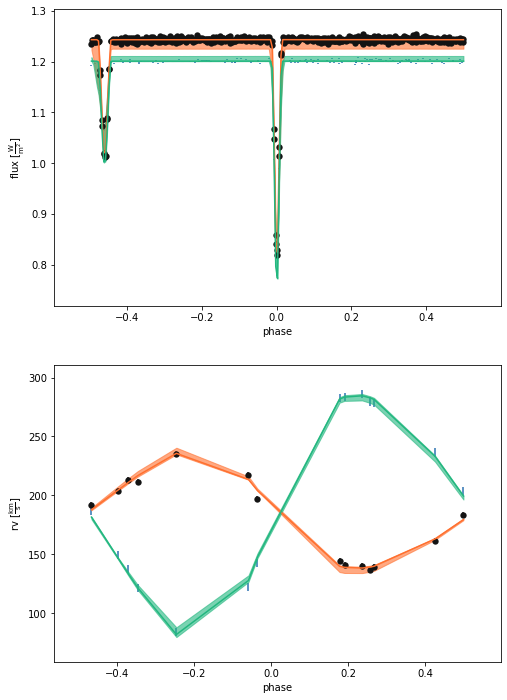

(<autofig.figure.Figure | 2 axes | 8 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [19]:
b.plot(['dataset', 'model'], model='after_mcmc2', x='phase', s=0.01, show=True)